# Градиентный бустинг для Классификации

Всего 8 баллов + 2 бонусных балла
(Для зачета необходимо 6 баллов)

В текущем ДЗ Вам предстоит попрактиковаться с градиентным бустингом на задаче классификации

## Создадим искусственный сет для классификации

In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights = [0.3])
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [4]:
y

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Задание 0. (0.5 балла)
Оцените количество уникальных классов в выборкe. Ответ выведите ниже. Является ли выборка сбалансированной?

[[-8.35059869  1.        ]
 [-8.23317407  1.        ]
 [-8.04265204  1.        ]
 ...
 [ 7.2703384   1.        ]
 [ 7.94130594  1.        ]
 [ 8.03517623  1.        ]]


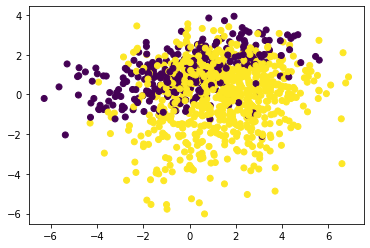

'выборка не сбалансирована, scatter смешан '

In [5]:
unique, counts = np.unique(X , return_counts=True)

result = np.column_stack((unique, counts)) 
print(result)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
'''выборка не сбалансирована, scatter смешан '''

### Задание 1. (1 балл)
1. Выполните кросс-валидацию со стратификацией (чтобы сохранялось соотношение классов в каждой подвыборке).

Для этого сперва необходимо инициализировать метод RepeatedStratifiedKFold со следующими параметрами: n_splits=10, n_repeats=3, random_state=1. 

Затем инициализировать метод cross_val_score (сохраните его в переменную n_scores), передать в него вашу модель, X, y и cv=cv, где cv это инициализированный ранее RepeatedStratifiedKFold. Также укажите n_jobs = -1 и error_score='raise'.

In [6]:
#gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, linear_model
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV

In [8]:
from re import search
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, cv=cv, n_jobs = -1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.919 (0.028)


### Задание 2. (7 заданий по 0,5 балла)
1. Разделите ваш датасет (X,y) на тренировочную и тестовые выборки c test_size=0.2, random_state=1.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

2. Инициализируйте модель GradientBoostingClassifier

In [11]:
model = GradientBoostingClassifier()

3. Обучите модель при помощи метода fit() на тренировочных данных (пока не указывайте дополнительных настроек модели, передайте в метод только X_train, y_train)

In [12]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

4. Сделайте предсказания при помощи метода predict на тестовом наборе данных и сохраните предсказания в переменную y_predicted

In [13]:
y_predicted = model.predict(X_val)

5. При помощи метода confusion_matrix из sklearn выведите матрицу ошибок алгоритма на тестовом наборе данных (между y_test и y_predicted). Можете (по желанию) ее визуализировать при помощи библиотеки seaborn - сиборн удобен для визуализации матриц ошибок.

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

[[ 51   7]
 [  7 135]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.95      0.95      0.95       142

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



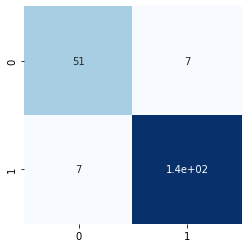

In [26]:
mist = confusion_matrix(y_val, y_predicted)
classf = classification_report(y_val, y_predicted)
print(mist)
print(classf)
sns.heatmap(mist, square=True, annot=True, cbar=False, cmap='Blues')


6. Выведете ROC кривую. Помните, что для этого нужны вероятность класса (с.м. метод predict_proba у модели)

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.480
Logistic: ROC AUC=0.959


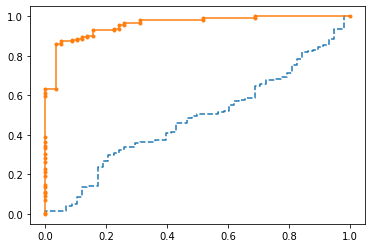

In [17]:
ns_probs = np.random.uniform(low=0.0, high=1.0, size=len(y_val))
lr_probs = model.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

7. Посчитайте метрику ROC AUC и F1 score на тестовом наборе данных (между y_test и y_predicted/y_proba)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [19]:
f1_score_predicted = f1_score(y_val, y_predicted)
f1_score_probs = f1_score(y_val, np.round(abs(lr_probs)))
roc_auc_score_proba = roc_auc_score(y_val, np.round(abs(lr_probs)))
roc_auc_score_predicted = roc_auc_score(y_val, y_predicted)

print(f1_score_predicted, f1_score_probs)
print(roc_auc_score_proba, roc_auc_score_predicted)

0.9236111111111112 0.9236111111111112
0.8562408936376881 0.8562408936376881


## Задание 3 (3 балла)

До этого мы пользовались с Вами методом "из коробки". Это не есть хорошо, поэтому поиграйте с настройками гиперпараметров алгоритма (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), чтобы улучшить вид confusion matrix, а также roc_auc_score и f1_score

[[ 51   7]
 [  7 135]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.95      0.95      0.95       142

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



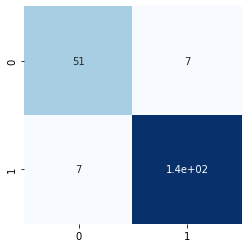

In [20]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=5, random_state=1, weights = [0.3])
model = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,
                                   max_depth=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

mist = confusion_matrix(y_test, y_predicted)
classf = classification_report(y_test, y_predicted)
print(mist)
print(classf)
sns.heatmap(mist, square=True, annot=True, cbar=False, cmap='Blues')

No Skill: ROC AUC=0.548
Logistic: ROC AUC=0.956


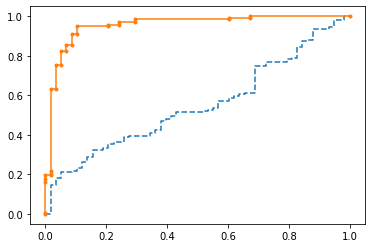

In [21]:
ns_probs = np.random.uniform(low=0.0, high=1.0, size=len(y_val))
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

In [22]:
f1_score_predicted = f1_score(y_test, y_predicted)
f1_score_probs = f1_score(y_test, np.round(abs(lr_probs)))
roc_auc_score_proba = roc_auc_score(y_test, np.round(abs(lr_probs)))
roc_auc_score_predicted = roc_auc_score(y_test, y_predicted)

print(f1_score_predicted, f1_score_probs)
print(roc_auc_score_proba, roc_auc_score_predicted)

0.9507042253521126 0.9507042253521126
0.9150072850898493 0.9150072850898493


##Задание 4 - бонусное (+2 балла)

Попробуйте провести классифкацию, используя алгоритм, изначально предназначенный для регрессии. Например https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Получается ли что нибудь?

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
params = {
    "n_estimators": 100,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    'random_state': 0,
}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.1150


Мы можем только использовать для определения оптимального количества деревьев 


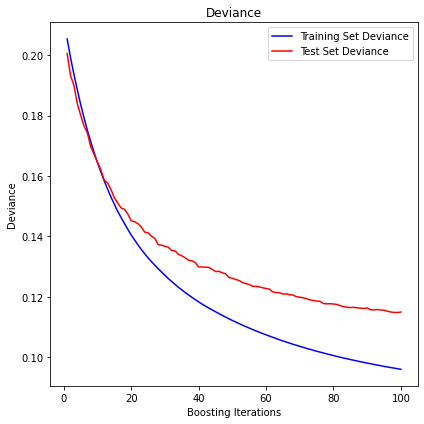

In [25]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)
print('Мы можем только использовать для определения оптимального количества деревьев ')
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()